In [1]:
import pandas
pandas.set_option('display.max_columns', None)
import pm4py

import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
import event_log_transformer

In [2]:
file_path = '../../../data/DomesticDeclarations.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

In [3]:
event_log

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 17:50:14+00:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 17:56:13+00:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 08:55:52+00:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 08:20:28+00:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576


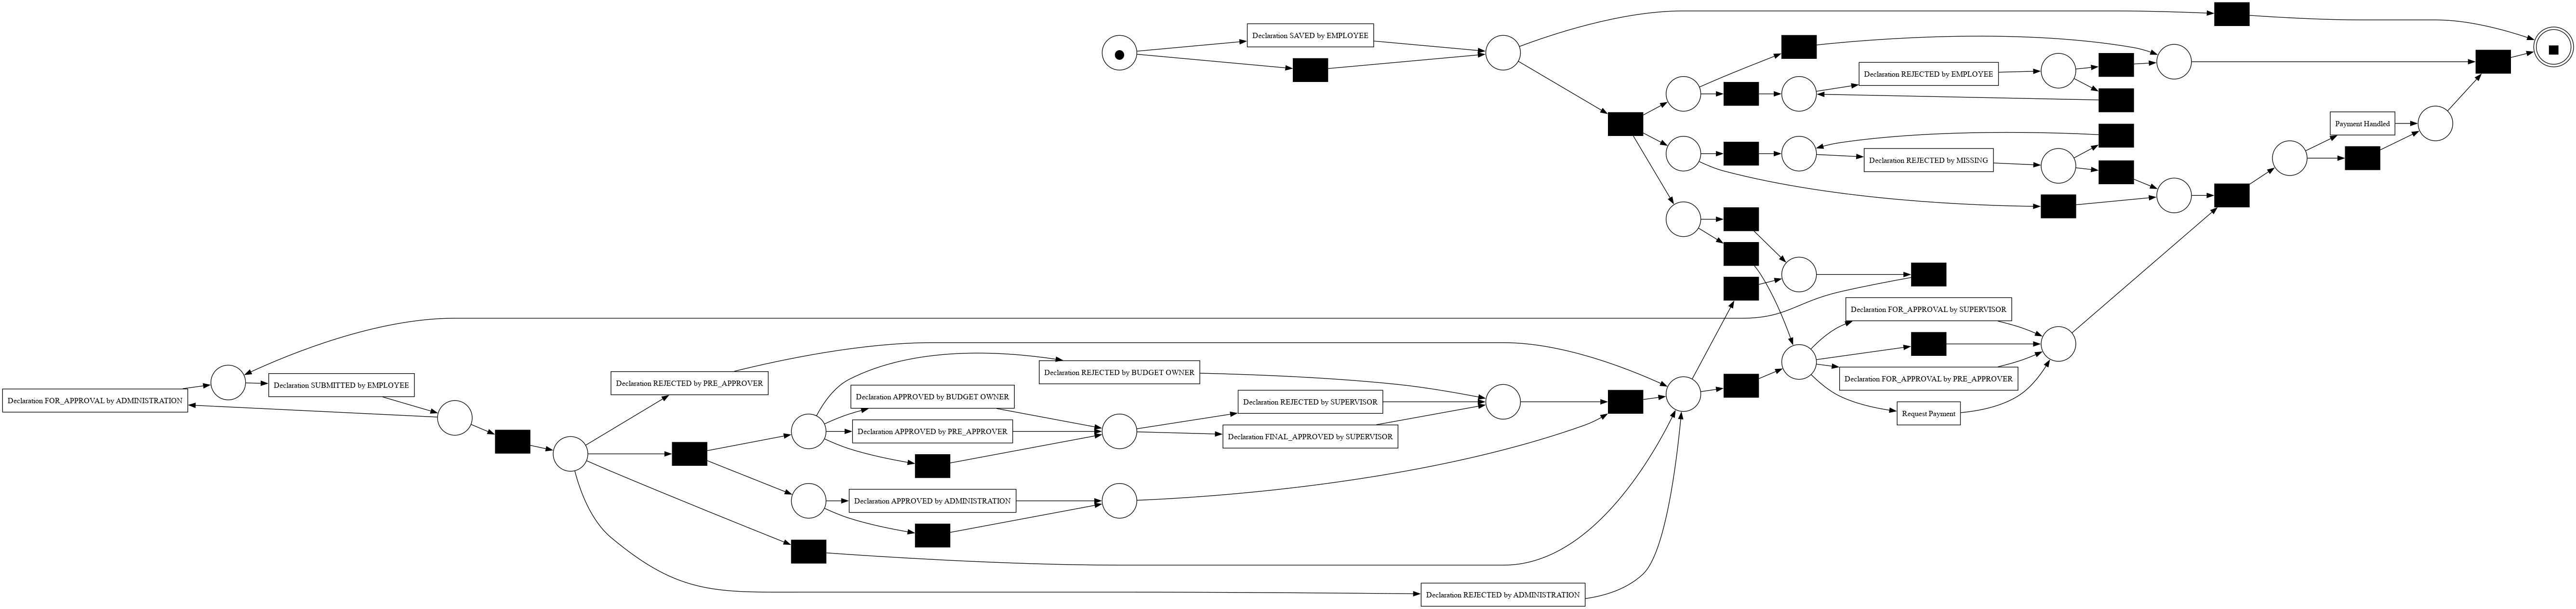

In [4]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

In [5]:
len(event_log['case:id'].unique())

10500

In [6]:
event_log['concept:name'].unique()

array(['Declaration SUBMITTED by EMPLOYEE',
       'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment',
       'Payment Handled', 'Declaration APPROVED by PRE_APPROVER',
       'Declaration REJECTED by MISSING',
       'Declaration REJECTED by PRE_APPROVER',
       'Declaration REJECTED by EMPLOYEE',
       'Declaration SAVED by EMPLOYEE',
       'Declaration REJECTED by SUPERVISOR',
       'Declaration APPROVED by ADMINISTRATION',
       'Declaration APPROVED by BUDGET OWNER',
       'Declaration FOR_APPROVAL by SUPERVISOR',
       'Declaration REJECTED by ADMINISTRATION',
       'Declaration FOR_APPROVAL by PRE_APPROVER',
       'Declaration REJECTED by BUDGET OWNER',
       'Declaration FOR_APPROVAL by ADMINISTRATION'], dtype=object)

In [7]:
event_log['case:BudgetNumber'].unique()

array(['budget 86566'], dtype=object)

In [8]:
print(len(event_log['case:DeclarationNumber'].unique()))
event_log['case:DeclarationNumber'].unique()

10049


array(['declaration number 86792', 'declaration number 86796',
       'declaration number 86801', ..., 'declaration number 138350',
       'declaration number 138355', 'declaration number 138360'],
      dtype=object)

In [9]:
event_log[event_log['case:concept:name'] == 'declaration 86791']

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205


In [10]:
start_end_event_log = TransformEventLog.start_end_event_log_next(event_log)

In [11]:
start_end_event_log = TransformEventLog.seconds_in_day(start_end_event_log, 'time:timestamp_start')
start_end_event_log = TransformEventLog.day_of_week(start_end_event_log, 'time:timestamp_start')

In [12]:
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'concept:name_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')

In [13]:
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'org:resource_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')

In [14]:
start_end_event_log = start_end_event_log.sort_values(by='time:timestamp_start')


In [15]:
start_end_event_log[start_end_event_log['case:concept:name'] == 'declaration 86791']

,id_start,org:resource_start,concept:name_start,time:timestamp_start,org:role_start,case:id_start,case:concept:name,case:BudgetNumber_start,case:DeclarationNumber_start,case:Amount_start,id_complete,org:resource_complete,concept:name_complete,time:timestamp_complete,org:role_complete,case:id_complete,case:BudgetNumber_complete,case:DeclarationNumber_complete,case:Amount_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,Declaration APPROVED by PRE_APPROVER,Declaration FINAL_APPROVED by SUPERVISOR,Declaration FOR_APPROVAL by ADMINISTRATION,Declaration FOR_APPROVAL by PRE_APPROVER,Declaration FOR_APPROVAL by SUPERVISOR,Declaration REJECTED by ADMINISTRATION,Declaration REJECTED by BUDGET OWNER,Declaration REJECTED by EMPLOYEE,Declaration REJECTED by MISSING,Declaration REJECTED by PRE_APPROVER,Declaration REJECTED by SUPERVISOR,Declaration SAVED by EMPLOYEE,Declaration SUBMITTED by EMPLOYEE,Payment Handled,Request Payment,STAFF MEMBER,SYSTEM
38278,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,budget 86566,declaration number 86792,26.851205,0 days 01:37:58,5878.0,5878000.0,1.632778,35390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38277,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,budget 86566,declaration number 86792,26.851205,0 days 22:06:56,79616.0,79616000.0,22.115556,41268,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
7384,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,budget 86566,declaration number 86792,26.851205,2 days 07:56:38,201398.0,201398000.0,55.943889,34484,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1


In [16]:
start_end_event_log

,id_start,org:resource_start,concept:name_start,time:timestamp_start,org:role_start,case:id_start,case:concept:name,case:BudgetNumber_start,case:DeclarationNumber_start,case:Amount_start,id_complete,org:resource_complete,concept:name_complete,time:timestamp_complete,org:role_complete,case:id_complete,case:BudgetNumber_complete,case:DeclarationNumber_complete,case:Amount_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,Declaration APPROVED by PRE_APPROVER,Declaration FINAL_APPROVED by SUPERVISOR,Declaration FOR_APPROVAL by ADMINISTRATION,Declaration FOR_APPROVAL by PRE_APPROVER,Declaration FOR_APPROVAL by SUPERVISOR,Declaration REJECTED by ADMINISTRATION,Declaration REJECTED by BUDGET OWNER,Declaration REJECTED by EMPLOYEE,Declaration REJECTED by MISSING,Declaration REJECTED by PRE_APPROVER,Declaration REJECTED by SUPERVISOR,Declaration SAVED by EMPLOYEE,Declaration SUBMITTED by EMPLOYEE,Payment Handled,Request Payment,STAFF MEMBER,SYSTEM
38278,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,budget 86566,declaration number 86792,26.851205,0 days 01:37:58,5878.0,5.878000e+06,1.632778,35390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38280,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172,st_step 86799_0,STAFF MEMBER,Declaration APPROVED by PRE_APPROVER,2017-02-22 10:29:21+00:00,PRE_APPROVER,declaration 86795,budget 86566,declaration number 86796,182.464172,44 days 00:03:07,3801787.0,3.801787e+09,1056.051944,37574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38284,st_step 86804_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 11:13:33+00:00,EMPLOYEE,declaration 86800,declaration 86800,budget 86566,declaration number 86801,320.646137,st_step 86802_0,STAFF MEMBER,Declaration APPROVED by PRE_APPROVER,2017-02-02 18:58:50+00:00,PRE_APPROVER,declaration 86800,budget 86566,declaration number 86801,320.646137,24 days 07:45:17,2101517.0,2.101517e+09,583.754722,40413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38243,st_step 86733_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 11:24:20+00:00,EMPLOYEE,declaration 86731,declaration 86731,budget 86566,declaration number 86732,113.862047,st_step 86734_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:37:23+00:00,SUPERVISOR,declaration 86731,budget 86566,declaration number 86732,113.862047,0 days 00:13:03,783.0,7.830000e+05,0.217500,41060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38277,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,budget 86566,declaration number 86792,26.851205,0 days 22:06:56,79616.0,7.961600e+07,22.115556,41268,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27047,st_step 126250_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-04-10 11:12:37+00:00,SUPERVISOR,declaration 126246,declaration 126246,budget 86566,declaration number 126247,32.034635,dd_declaration 126246_19,SYSTEM,Request Payment,2019-04-15 16:37:41+00:00,UNDEFINED,declaration 126246,budget 86566,declaration number 126247,32.034635,5 days 05:25:04,451504.0,4.515040e+08,125.417778,40357,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0
4431,dd_declaration 126246_19,SYSTEM,Reques

In [17]:
start_end_event_log.to_csv('../transformed_event_logs/BPIC_2020_DD_start_end.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
start_end_event_log.to_pickle('../transformed_event_logs/BPIC_2020_DD_start_end.pickle')